# Anaylizing NBA Game stats 2014-2019

In [1]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from scipy import stats # significance levels, normality
import itertools

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') # hide matplotlib warnings

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
game_detail_df = pd.read_csv('Datasets/games_details.csv')
games_df = pd.read_csv('Datasets/games.csv')
players_df = pd.read_csv('Datasets/players.csv')
ranking_df = pd.read_csv('Datasets/ranking.csv')
teams_df = pd.read_csv('Datasets/teams.csv')

# EDA on our Data

### Inspecting game_detail_df

In [3]:
game_detail_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,40800405,1610612747,LAL,Los Angeles,2772,Trevor Ariza,F,NaN,41:29,5.0,...,1.0,4.0,5.0,1.0,2.0,0.0,3.0,3.0,15.0,12.0
1,40800405,1610612747,LAL,Los Angeles,2200,Pau Gasol,F,NaN,42:09,6.0,...,4.0,11.0,15.0,3.0,0.0,4.0,1.0,2.0,14.0,15.0
2,40800405,1610612747,LAL,Los Angeles,101115,Andrew Bynum,C,NaN,16:54,3.0,...,4.0,1.0,5.0,0.0,1.0,0.0,1.0,5.0,6.0,-6.0
3,40800405,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,NaN,43:18,10.0,...,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0,14.0
4,40800405,1610612747,LAL,Los Angeles,965,Derek Fisher,G,NaN,31:59,4.0,...,0.0,4.0,4.0,2.0,0.0,0.0,1.0,4.0,13.0,16.0


In [4]:
game_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561733 entries, 0 to 561732
Data columns (total 28 columns):
GAME_ID              561733 non-null int64
TEAM_ID              561733 non-null int64
TEAM_ABBREVIATION    561733 non-null object
TEAM_CITY            561733 non-null object
PLAYER_ID            561733 non-null int64
PLAYER_NAME          561733 non-null object
START_POSITION       215354 non-null object
COMMENT              89924 non-null object
MIN                  471808 non-null object
FGM                  471808 non-null float64
FGA                  471808 non-null float64
FG_PCT               471808 non-null float64
FG3M                 471808 non-null float64
FG3A                 471808 non-null float64
FG3_PCT              471808 non-null float64
FTM                  471808 non-null float64
FTA                  471808 non-null float64
FT_PCT               471808 non-null float64
OREB                 471808 non-null float64
DREB                 471808 non-null float64
RE

Removing unnecessary Columns from our game_detail_df

In [5]:
game_detail_df.drop(columns=['COMMENT', 'PLUS_MINUS', 'START_POSITION', 'TEAM_CITY'], inplace=True)

In [6]:
game_detail_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
0,40800405,1610612747,LAL,2772,Trevor Ariza,41:29,5.0,12.0,0.417,2.0,...,0.5,1.0,4.0,5.0,1.0,2.0,0.0,3.0,3.0,15.0
1,40800405,1610612747,LAL,2200,Pau Gasol,42:09,6.0,9.0,0.667,0.0,...,0.5,4.0,11.0,15.0,3.0,0.0,4.0,1.0,2.0,14.0
2,40800405,1610612747,LAL,101115,Andrew Bynum,16:54,3.0,11.0,0.273,0.0,...,0.0,4.0,1.0,5.0,0.0,1.0,0.0,1.0,5.0,6.0
3,40800405,1610612747,LAL,977,Kobe Bryant,43:18,10.0,23.0,0.435,2.0,...,1.0,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0
4,40800405,1610612747,LAL,965,Derek Fisher,31:59,4.0,7.0,0.571,1.0,...,1.0,0.0,4.0,4.0,2.0,0.0,0.0,1.0,4.0,13.0


In [7]:
# Create a new Column called DF_SCORE based on
game_detail_df["DF_SCORE"] = round((game_detail_df.PTS + game_detail_df.FG3M *0.5 + game_detail_df.REB *1.25 + game_detail_df.AST * 1.5 + game_detail_df.STL *2 + game_detail_df.BLK *2 - game_detail_df.TO * 0.5),2)

In [8]:
game_detail_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,DF_SCORE
0,40800405,1610612747,LAL,2772,Trevor Ariza,41:29,5.0,12.0,0.417,2.0,...,1.0,4.0,5.0,1.0,2.0,0.0,3.0,3.0,15.0,26.25
1,40800405,1610612747,LAL,2200,Pau Gasol,42:09,6.0,9.0,0.667,0.0,...,4.0,11.0,15.0,3.0,0.0,4.0,1.0,2.0,14.0,44.75
2,40800405,1610612747,LAL,101115,Andrew Bynum,16:54,3.0,11.0,0.273,0.0,...,4.0,1.0,5.0,0.0,1.0,0.0,1.0,5.0,6.0,13.75
3,40800405,1610612747,LAL,977,Kobe Bryant,43:18,10.0,23.0,0.435,2.0,...,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0,57.50
4,40800405,1610612747,LAL,965,Derek Fisher,31:59,4.0,7.0,0.571,1.0,...,0.0,4.0,4.0,2.0,0.0,0.0,1.0,4.0,13.0,21.00


In [9]:
game_detail_df.dropna(axis='rows', inplace=True)

In [10]:
game_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471808 entries, 0 to 561732
Data columns (total 25 columns):
GAME_ID              471808 non-null int64
TEAM_ID              471808 non-null int64
TEAM_ABBREVIATION    471808 non-null object
PLAYER_ID            471808 non-null int64
PLAYER_NAME          471808 non-null object
MIN                  471808 non-null object
FGM                  471808 non-null float64
FGA                  471808 non-null float64
FG_PCT               471808 non-null float64
FG3M                 471808 non-null float64
FG3A                 471808 non-null float64
FG3_PCT              471808 non-null float64
FTM                  471808 non-null float64
FTA                  471808 non-null float64
FT_PCT               471808 non-null float64
OREB                 471808 non-null float64
DREB                 471808 non-null float64
REB                  471808 non-null float64
AST                  471808 non-null float64
STL                  471808 non-null float6

In [11]:
#cleaning our column for our join and then Hypothesis
game_player_detail = game_detail_df[['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION','MIN','PLAYER_ID', 'PLAYER_NAME', 'DF_SCORE']]
game_player_detail

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,MIN,PLAYER_ID,PLAYER_NAME,DF_SCORE
0,40800405,1610612747,LAL,41:29,2772,Trevor Ariza,26.25
1,40800405,1610612747,LAL,42:09,2200,Pau Gasol,44.75
2,40800405,1610612747,LAL,16:54,101115,Andrew Bynum,13.75
3,40800405,1610612747,LAL,43:18,977,Kobe Bryant,57.50
4,40800405,1610612747,LAL,31:59,965,Derek Fisher,21.00
5,40800405,1610612747,LAL,31:44,1885,Lamar Odom,31.50
6,40800405,1610612747,LAL,14:07,2575,Luke Walton,6.00
7,40800405,1610612747,LAL,13:38,200770,Jordan Farmar,3.50
8,40800405,1610612747,LAL,4:42,2756,Sasha Vujacic,0.00
12,40800405,1610612753,ORL,42:05,2045,Hedo Turkoglu,20.50


### Inspecting game_df 

In [12]:
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2014-06-15,41300405,Final,1610612759,1610612748,2013,1610612759,104.0,0.474,0.783,...,25.0,40.0,1610612748,87.0,0.400,0.741,0.280,14.0,41.0,1
1,2014-06-12,41300404,Final,1610612748,1610612759,2013,1610612748,86.0,0.451,0.650,...,13.0,27.0,1610612759,107.0,0.571,0.720,0.429,25.0,44.0,0
2,2014-06-10,41300403,Final,1610612748,1610612759,2013,1610612748,92.0,0.516,0.750,...,17.0,26.0,1610612759,111.0,0.594,0.813,0.450,21.0,29.0,0
3,2014-06-08,41300402,Final,1610612759,1610612748,2013,1610612759,96.0,0.439,0.600,...,26.0,37.0,1610612748,98.0,0.529,0.762,0.421,16.0,38.0,0
4,2014-06-05,41300401,Final,1610612759,1610612748,2013,1610612759,110.0,0.588,0.773,...,30.0,39.0,1610612748,95.0,0.474,0.818,0.414,16.0,29.0,1


In [13]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22594 entries, 0 to 22593
Data columns (total 21 columns):
GAME_DATE_EST       22594 non-null object
GAME_ID             22594 non-null int64
GAME_STATUS_TEXT    22594 non-null object
HOME_TEAM_ID        22594 non-null int64
VISITOR_TEAM_ID     22594 non-null int64
SEASON              22594 non-null int64
TEAM_ID_home        22594 non-null int64
PTS_home            22495 non-null float64
FG_PCT_home         22495 non-null float64
FT_PCT_home         22495 non-null float64
FG3_PCT_home        22495 non-null float64
AST_home            22495 non-null float64
REB_home            22495 non-null float64
TEAM_ID_away        22594 non-null int64
PTS_away            22495 non-null float64
FG_PCT_away         22495 non-null float64
FT_PCT_away         22495 non-null float64
FG3_PCT_away        22495 non-null float64
AST_away            22495 non-null float64
REB_away            22495 non-null float64
HOME_TEAM_WINS      22594 non-null int64
dtyp

In [14]:
# We are taking these specific columns, we will use them in order to test our first Hypothesis
game_hometeam_df = games_df[['GAME_ID','GAME_DATE_EST', 'HOME_TEAM_ID', 'HOME_TEAM_WINS']]
game_hometeam_df.head()

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS
0,41300405,2014-06-15,1610612759,1
1,41300404,2014-06-12,1610612748,0
2,41300403,2014-06-10,1610612748,0
3,41300402,2014-06-08,1610612759,0
4,41300401,2014-06-05,1610612759,1


In [15]:
# games_df.drop(columns=['GAME_STATUS_TEXT'], inplace=True)

In [16]:
# games_df.dropna(axis='rows', inplace=True)

In [17]:
#join both game_hometeam_df and game_player_detail
df2 = pd.merge(game_player_detail, game_hometeam_df, on='GAME_ID')
df2.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,MIN,PLAYER_ID,PLAYER_NAME,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS
0,40800405,1610612747,LAL,41:29,2772,Trevor Ariza,26.25,2009-06-14,1610612753,0
1,40800405,1610612747,LAL,42:09,2200,Pau Gasol,44.75,2009-06-14,1610612753,0
2,40800405,1610612747,LAL,16:54,101115,Andrew Bynum,13.75,2009-06-14,1610612753,0
3,40800405,1610612747,LAL,43:18,977,Kobe Bryant,57.50,2009-06-14,1610612753,0
4,40800405,1610612747,LAL,31:59,965,Derek Fisher,21.00,2009-06-14,1610612753,0


In [18]:
# pd.to_numeric(df2['MIN'],downcast='float')
# df2['MIN'] = df2['MIN']map(lambda x: x.split(':'))
def minutes(value):
    list_nb = value.split(':')
    if len(list_nb) == 1:
        return float(list_nb[0])
    else:
        return round(float(list_nb[0]) + (float(list_nb[1])/60),2)
df2['MIN'] = df2['MIN'].apply(minutes)

In [19]:
df2.MIN.dtype

dtype('float64')

In [20]:
#creating a new column to see if the TEAM_ID == HOME_TEAM_ID to ensure they did play at home.
df2.loc[(df2['TEAM_ID'] == df2['HOME_TEAM_ID']), 'PLAYED_HOME'] = 1
df2.loc[(df2['TEAM_ID'] != df2['HOME_TEAM_ID']), 'PLAYED_HOME'] = 0

# using the previously made column to count win
df2.loc[(df2['PLAYED_HOME'] ==1), 'WIN'] = 1
df2.loc[(df2['PLAYED_HOME'] !=1), 'WIN'] = 0
df_MIN_ten = df2.loc[(df2['MIN'] > 10)]
df_MIN_ten.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,MIN,PLAYER_ID,PLAYER_NAME,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,PLAYED_HOME,WIN
0,40800405,1610612747,LAL,41.48,2772,Trevor Ariza,26.25,2009-06-14,1610612753,0,0.0,0.0
1,40800405,1610612747,LAL,42.15,2200,Pau Gasol,44.75,2009-06-14,1610612753,0,0.0,0.0
2,40800405,1610612747,LAL,16.90,101115,Andrew Bynum,13.75,2009-06-14,1610612753,0,0.0,0.0
3,40800405,1610612747,LAL,43.30,977,Kobe Bryant,57.50,2009-06-14,1610612753,0,0.0,0.0
4,40800405,1610612747,LAL,31.98,965,Derek Fisher,21.00,2009-06-14,1610612753,0,0.0,0.0


In [21]:
#finding players who have a mean score higher then a certain avg score and played enough games
df_top_player_avg = df2.groupby('PLAYER_NAME')['DF_SCORE'].mean()
df_top_player_avg.sort_values(ascending=False)
# df_top_player_avg.head()
# df_top_player_avg.count()

df_top_player_count = df2.groupby('PLAYER_NAME')['DF_SCORE'].count()
df_top_player_count.sort_values(ascending=False)
frame = {'DF_AVG_SCORE': df_top_player_avg, 'GAMES_PLAYED': df_top_player_count}
df_top_player_stat = pd.DataFrame(frame)
df_top_player_stat.head(20)

# df_top_player_stat = df_top_player_stat[df_top_player_stat['GAMES_PLAYED'] > 250]
df_top_player_stat = df_top_player_stat[(df_top_player_stat['DF_AVG_SCORE'] > 10) &
                                        (df_top_player_stat['GAMES_PLAYED'] > 250)]
list_players = df_top_player_stat.index
len(list_players) # 277 players that we want to use for our analysis
# list_players

616

In [22]:
df3 = df2.loc[(df2['PLAYER_NAME'].isin(list_players))]
df3_home = df3.loc[(df3['WIN'] == 1)]
df3_away = df3.loc[(df3['WIN'] == 0)]
df3_home.head()
df3_away.head()


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,MIN,PLAYER_ID,PLAYER_NAME,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,PLAYED_HOME,WIN
0,40800405,1610612747,LAL,41.48,2772,Trevor Ariza,26.25,2009-06-14,1610612753,0,0.0,0.0
1,40800405,1610612747,LAL,42.15,2200,Pau Gasol,44.75,2009-06-14,1610612753,0,0.0,0.0
2,40800405,1610612747,LAL,16.90,101115,Andrew Bynum,13.75,2009-06-14,1610612753,0,0.0,0.0
3,40800405,1610612747,LAL,43.30,977,Kobe Bryant,57.50,2009-06-14,1610612753,0,0.0,0.0
4,40800405,1610612747,LAL,31.98,965,Derek Fisher,21.00,2009-06-14,1610612753,0,0.0,0.0


In [23]:
# df3_away.count()

In [24]:
df3_home_avg = df3_home.groupby('PLAYER_NAME')['DF_SCORE'].mean()
df3_away_avg = df3_away.groupby('PLAYER_NAME')['DF_SCORE'].mean()
frame = {'HOME_AVG': df3_home_avg, 'AWAY_AVG': df3_away_avg}
df3_home_away_stat = pd.DataFrame(frame)
df3_home_away_stat.head()
df3_home_away_stat['AVG_DIFFERENCE'] = ((df3_home_away_stat.HOME_AVG - df3_home_away_stat.AWAY_AVG))
df3_home_away_stat.head()
# df3_home_away_stat.AVG_DIFFERENCE.mean()

,HOME_AVG,AWAY_AVG,AVG_DIFFERENCE
PLAYER_NAME,,,
AJ Price,12.397651,11.822368,0.575283
Aaron Brooks,17.017717,17.426997,-0.409281
Aaron Gordon,26.473171,25.286486,1.186684
Adonal Foyle,12.828947,10.568182,2.260766
Al Harrington,26.987758,25.996250,0.991508


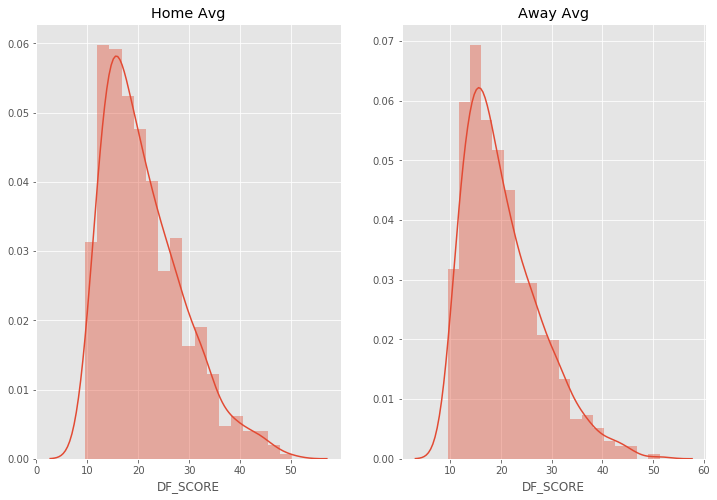

In [25]:
plt.figure(figsize=(12,8))
ax = plt.subplot(121)
plt.title('Home Avg')
sns.distplot(df3_home_avg)

ax = plt.subplot(122)
plt.title('Away Avg')
sns.distplot(df3_away_avg)

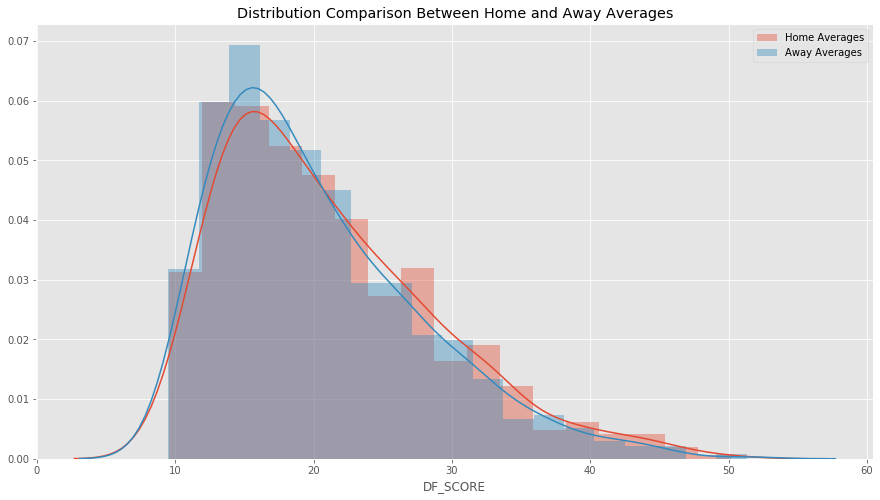

In [26]:
plt.figure(figsize=(15,8))
plt.title('Distribution Comparison Between Home and Away Averages')
sns.distplot(df3_home_avg, label='Home Averages')
sns.distplot(df3_away_avg, label='Away Averages')
plt.legend()

In [27]:
# sns.distplot(df3_home_away_stat.AVG_DIFFERENCE)
# t_stat, P_value = stats.ttest_ind(df3_home, df3_away)
# print(t_stat, P_value)

### Hypothesis1: Is there a significant difference in player performance when playing Home vs Away

In [28]:
# lets take Home_avg as our Control group and Away_avg as our experimental group
control = df3_home_avg
experimental = df3_away_avg

In [29]:
#Two sample Student's T-Test:
def two_sample_ttest(sample1, sample2, alpha):
    n_sample1 = len(sample1)
    n_sample2 = len(sample2)
    t_stat, P_value = stats.ttest_ind(sample1, sample2)
    t_crit = stats.t.ppf(1-(alpha/2), (n_sample1+n_sample2-2))
    mean_sample1 = round((sum(sample1)/n_sample1),3)
    mean_sample2 = round((sum(sample2)/n_sample2),3)
    mean_diff = round(abs(mean_sample1 - mean_sample2),3)
    # Outputs:
    print("Two Tail T-test:")
    print("---------------------------------------------------------------")
    print(f"Obs Number: Sample_1 = {n_sample1}   Sample_2 = {n_sample2}")
    print(f"Sample Means: Sample_1 = {mean_sample1}   Sample_2 = {mean_sample2}")
    print(f"Mean Differance: {mean_diff}")
#     sns.distplot(sample1), sns.distplot(sample2)
    print("---------------------------------------------------------------")
    print(f"t-crit: {t_crit} \nt-stat: {t_stat} \nP-value: {P_value} \nAlpha(2-Tail): {alpha/2}")
    print("---------------------------------------------------------------")
    if (abs(t_stat) > t_crit) and (P_value < (alpha/2)):
        print("|t_stat| > t_crit:",(abs(t_stat) > t_crit))
        print("P_value > Alpha(2-Tail):", (P_value < alpha))
        print("\nReject Null Hypothesis! The results shows that the samples are statistically significant.")
    else:
        print("|t_stat| > t_crit:",(abs(t_stat) > t_crit))
        print("P_value < Alpha(2-Tail):", (P_value < (alpha/2)))
        print("\nDo NOT Reject Null Hypotheses. The results are NOT statistically significant.")
    print("---------------------------------------------------------------")
    return None

Two Tail T-test:
---------------------------------------------------------------
Obs Number: Sample_1 = 616   Sample_2 = 616
Sample Means: Sample_1 = 21.125   Sample_2 = 20.344
Mean Differance: 0.781
---------------------------------------------------------------
t-crit: 1.9618945273326114 
t-stat: 1.7949923423579175 
P-value: 0.0729003554467178 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
|t_stat| > t_crit: False
P_value < Alpha(2-Tail): False

Do NOT Reject Null Hypotheses. The results are NOT statistically significant.
---------------------------------------------------------------


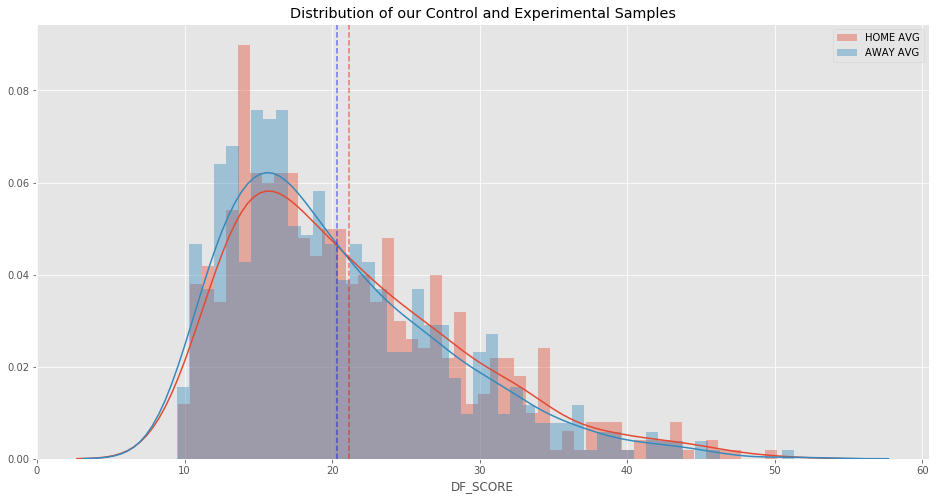

In [30]:
plt.figure(figsize=(16,8))
plt.title('Distribution of our Control and Experimental Samples')
sns.distplot(control, label='HOME AVG', bins=50)
sns.distplot(experimental, label='AWAY AVG',bins=50)
plt.legend()
plt.axvline(x=control.mean(), color='r',alpha = 0.5, linestyle='--')
plt.axvline(x=experimental.mean(), color='b',alpha = 0.5, linestyle='--')
two_sample_ttest(control, experimental, 0.05)

From this we can see that the effect sizes is very low. We can also see that the P-Value is greater then our Alpha and our T-Stat is less then our critical value. this all leads us to believe that there is no Significant effect on player performance whether they play at home or away

### Hypothesis2 is there significant difference in teams Making the Playoffs in the West Vs the East

In [31]:
ranking_df.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612759,0,22013,2014-08-31,West,San Antonio,82,62,20,0.756,32-9,30-11
1,1610612760,0,22013,2014-08-31,West,Oklahoma City,82,59,23,0.720,34-7,25-16
2,1610612746,0,22013,2014-08-31,West,L.A. Clippers,82,57,25,0.695,34-7,23-18
3,1610612745,0,22013,2014-08-31,West,Houston,82,54,28,0.659,33-8,21-20
4,1610612757,0,22013,2014-08-31,West,Portland,82,54,28,0.659,31-10,23-18


In [32]:
len(ranking_df.TEAM_ID.unique())


30

In [33]:
ranking_df.head()
ranking_df = ranking_df[ranking_df['G'] == 82]
season_list = list(ranking_df.SEASON_ID.unique())
season_df = []
for season_id in season_list:
    season_df.append(ranking_df[ranking_df['SEASON_ID'] == season_id])
    
#Season 2013/2014
ranking_df_2014 = season_df[0]
ranking_df_2014 = ranking_df_2014.drop_duplicates(subset='TEAM') 
#Season 2015/2016
ranking_df_2015 = season_df[14]
ranking_df_2015 = ranking_df_2015.drop_duplicates(subset='TEAM')
#Season 2016/2017
ranking_df_2016 = season_df[13]
ranking_df_2016 = ranking_df_2016.drop_duplicates(subset='TEAM')
#Season 2017/2018
ranking_df_2017 = season_df[12]
ranking_df_2017 = ranking_df_2017.drop_duplicates(subset='TEAM')
#Season 2018/2019
ranking_df_2018 = season_df[11]
ranking_df_2018 = ranking_df_2018.drop_duplicates(subset='TEAM')